# Telco Customer Churn: Exploratory Data Analysis

## 1. Understand the data 

In [52]:
# Load neccesory libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Load dataset
df = pd.read_csv(r"C:\Users\linto\Code\churn-x\telcoData\Telco_customer_churn.csv")

In [29]:
# checking first 3 rows of dataset
df.head(3)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved


In [34]:
# check shape of the dataset
df.shape

(7043, 33)

In [ ]:
# understanding summary statistics of each col
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [36]:
# checking data types of each col
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

## 2. Data Cleaning

In [55]:
# Remove unneccesory columns
df.drop(['CustomerID', 'Count', 'Lat Long'], axis=1, inplace=True)

In [57]:
# Changing data type of 'Total Charges' Object -> Int
# Convert to numeric (handles errors gracefully)
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Fill NaN values (if any) with 0 before converting to int
df['Total Charges'] = df['Total Charges'].fillna(0).astype(int)

In [ ]:
# Handling missing values
df.isna().sum()[df.isna().sum() > 0]

Churn Reason    5174
dtype: int64

Since ```Churn Reason``` have almost null values and this col is not necessory for ml, we can drop it.

In [ ]:
df.drop('Churn Reason', axis=1, inplace=True)

In [48]:
# Handling duplicate values
df.duplicated().sum()

np.int64(0)

## 3. Univariate Analysis

### 3.1 Categorical Columns

In [79]:
categorical_cols = [
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']

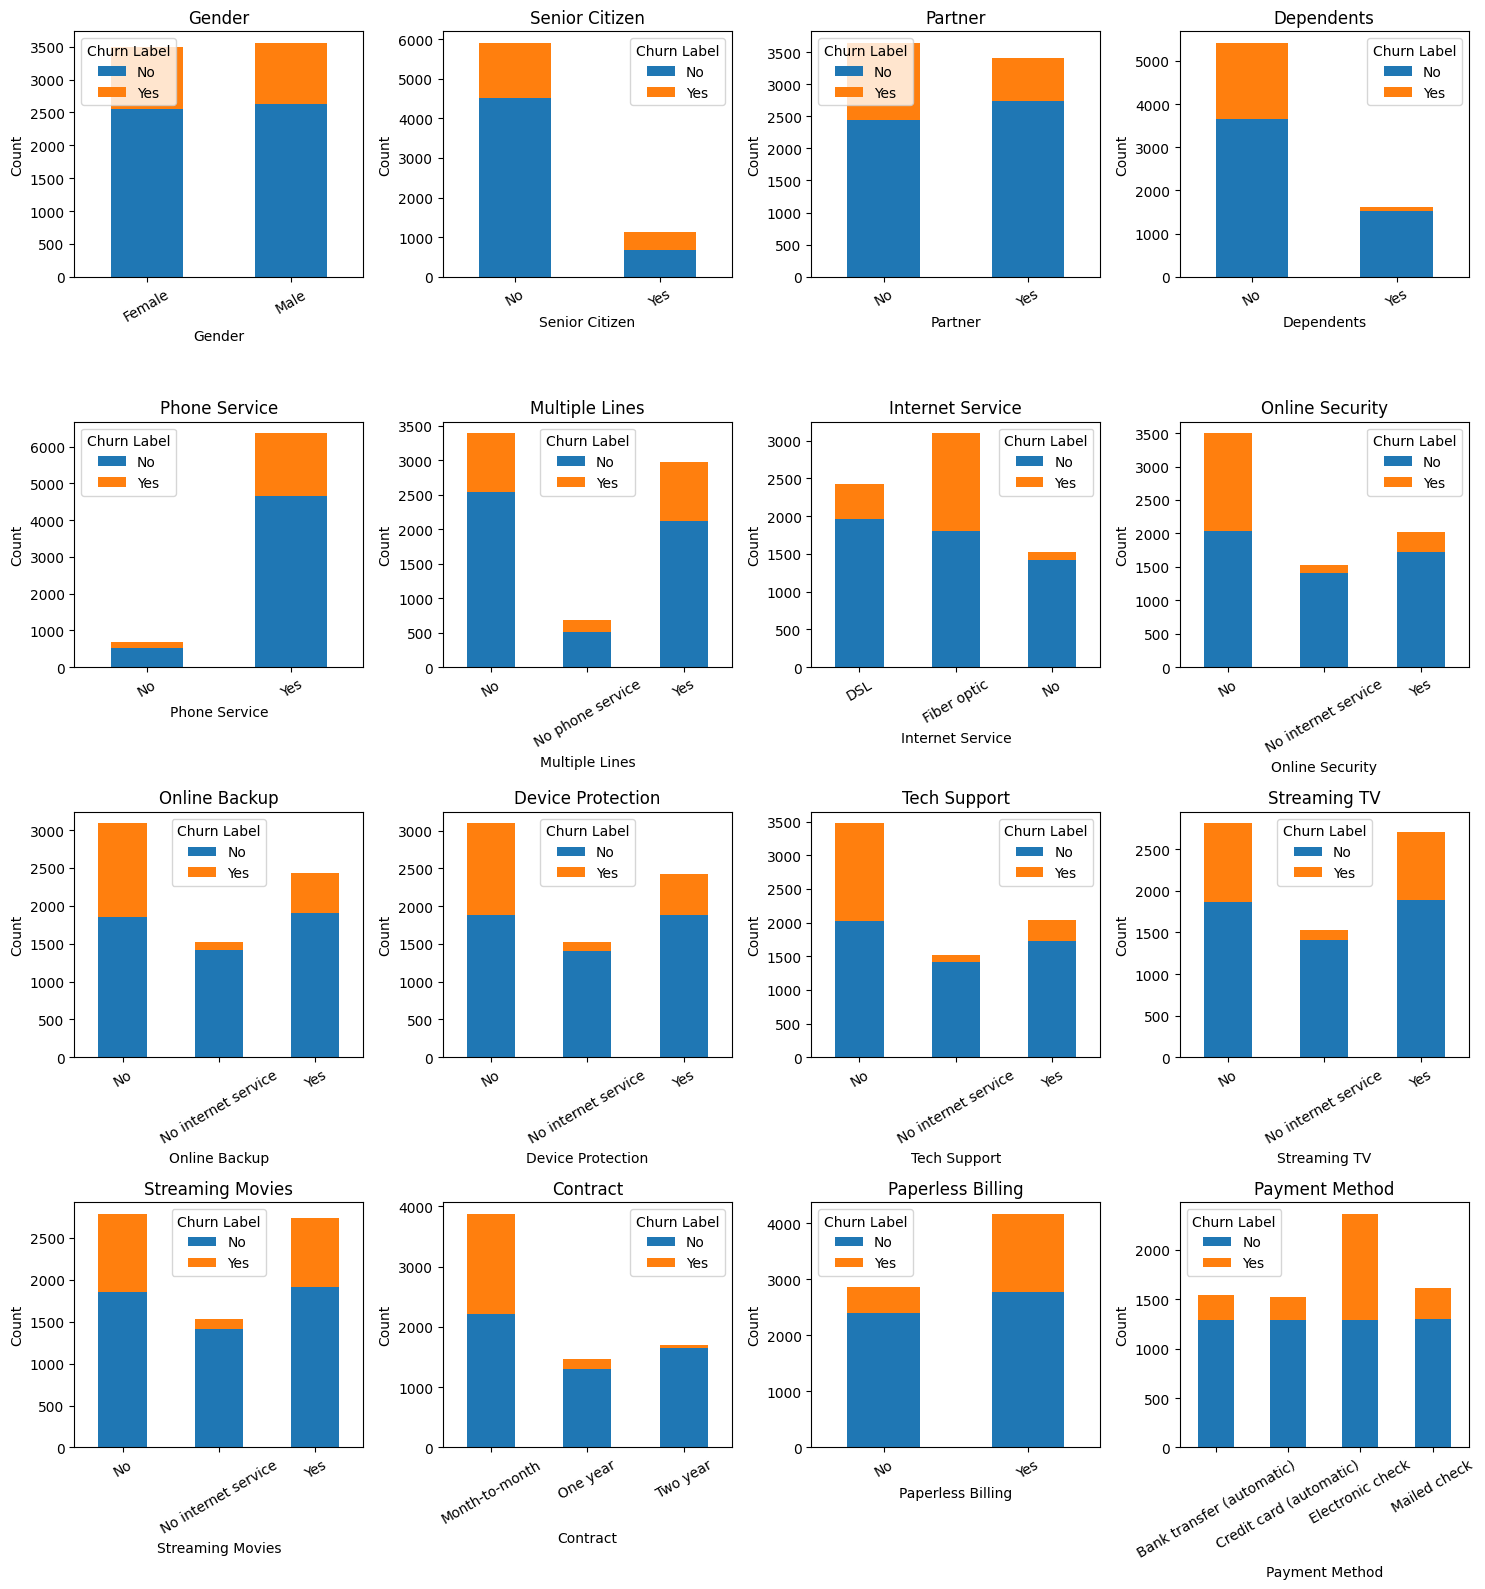

In [80]:
# define grid size (e.g., 3 columns)
n_cols = 4
n_rows = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))

# flatten axes for easy indexing
axes = axes.flatten()

# plot each categorical column
for i, col in enumerate(categorical_cols):
    crosstab = pd.crosstab(df[col], df['Churn Label'])
    crosstab.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=30)

# hide unused subplots if numeric_cols < n_cols * n_rows
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 3.2 Numerical Columns

In [81]:
numeric_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'CLTV']

#### Boxplot

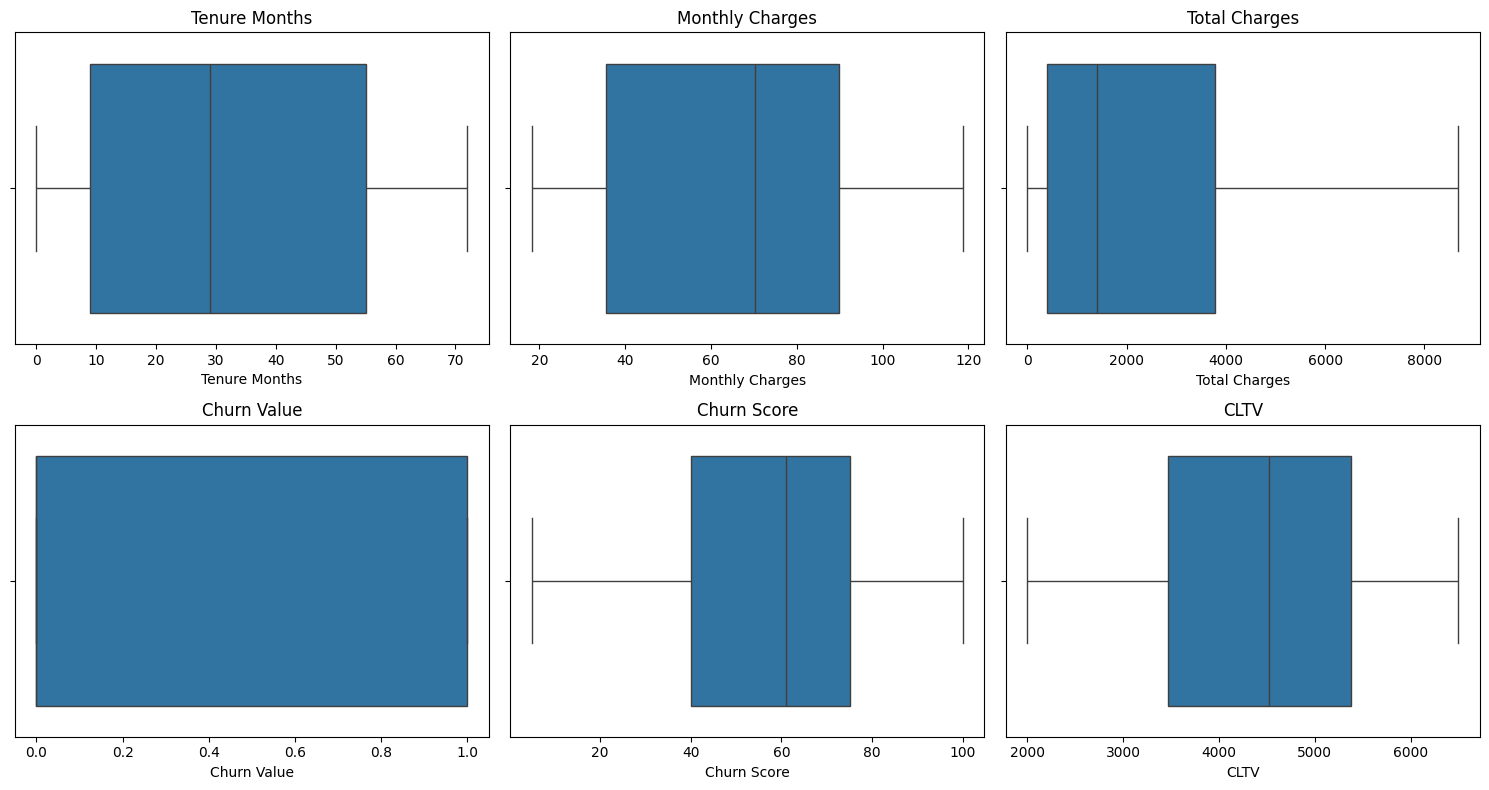

In [82]:
# define grid size (e.g., 3 columns)
n_cols = 3
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))

# flatten axes for easy indexing
axes = axes.flatten()

# plot each numerical column
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

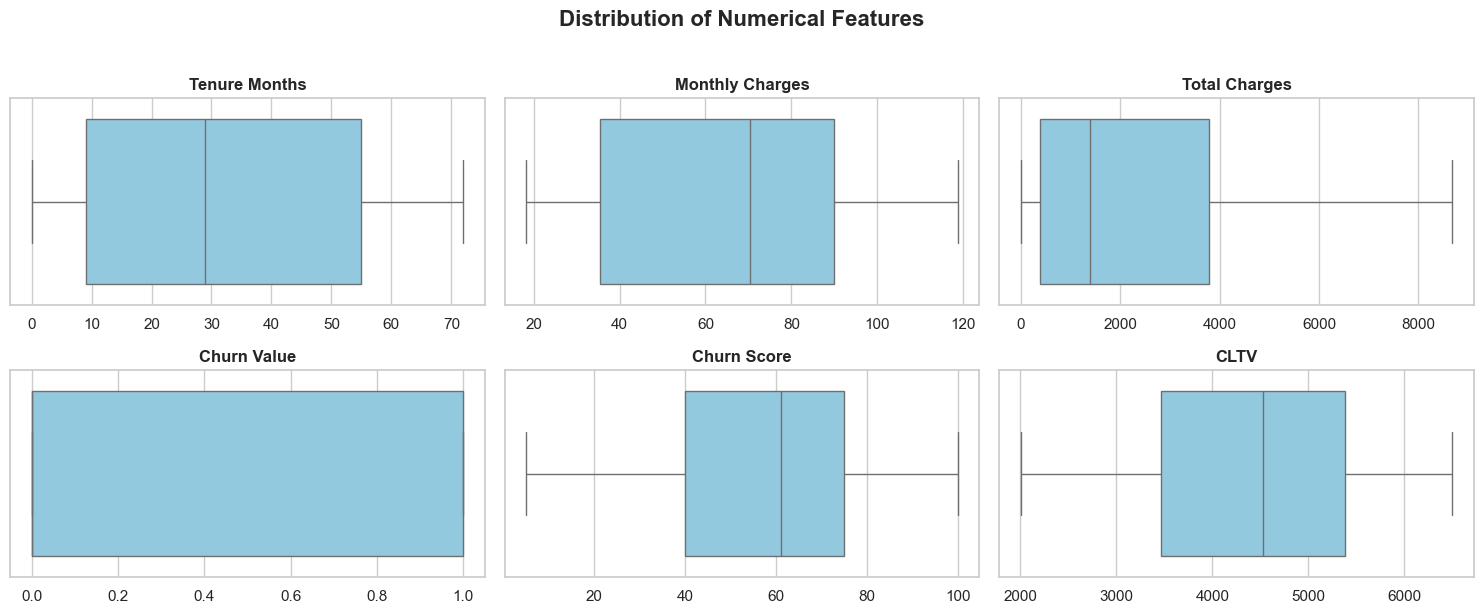

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", palette="pastel")

n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*3))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i], color="skyblue", fliersize=3, linewidth=1)
    axes[i].set_title(col, fontsize=12, fontweight="bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribution of Numerical Features", fontsize=16, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()


#### Distribution

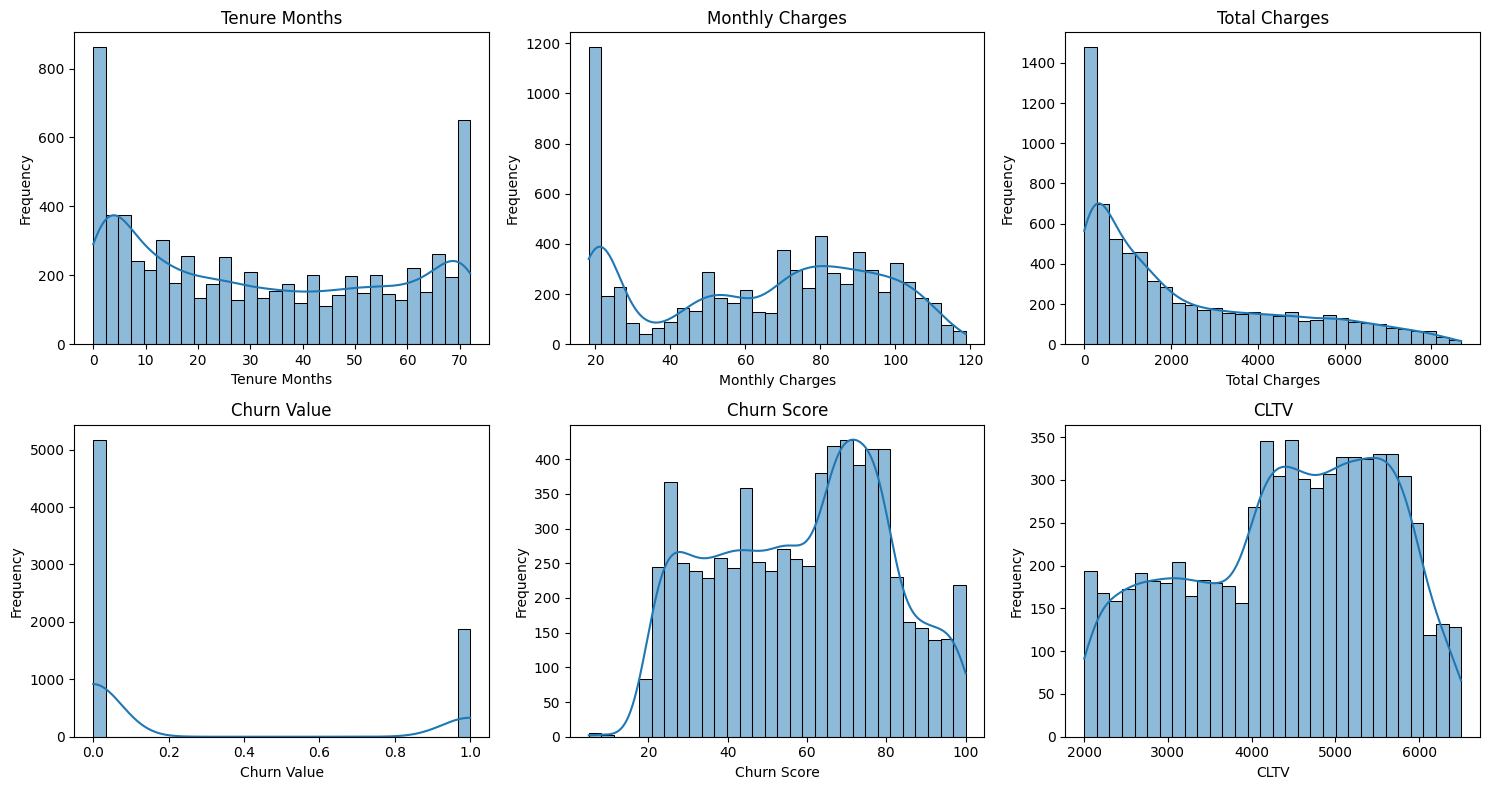

In [83]:
# define grid size (e.g., 3 columns)
n_cols = 3
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))

# flatten axes for easy indexing
axes = axes.flatten()

# plot each numerical column
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

## 4. Bivariate/Multivariate Analysis

## 5. Feature Engineering Insights

## 6. Data Distribution & Assumptions

## 7. Key Insights & Hypothesis

## 8. Saving Cleaned Model